In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import pandas as pd

# Read train and test data
train = pd.read_csv("/fraudTrain.csv")
test = pd.read_csv("/fraudTest.csv")

# Concatenate train and test data
data = pd.concat([train, test])

# Display summary statistics
print(data.describe())
print(train.shape)
print(test.shape)
display(data.head())
print(data.describe())
print(data.isnull().sum())


          Unnamed: 0        cc_num            amt            zip  \
count  122196.000000  1.221960e+05  122196.000000  122196.000000   
mean    35436.260000  4.182613e+17      71.262049   48694.313775   
std     24203.872082  1.309932e+18     149.808463   26886.352958   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%     15274.000000  1.800430e+14       9.700000   26041.000000   
50%     30548.500000  3.519230e+15      47.660000   48088.000000   
75%     54987.250000  4.635330e+15      83.610000   72011.000000   
max     85536.000000  4.992350e+18   13149.150000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  122195.000000  122195.000000  1.221950e+05  1.221940e+05   
mean       38.543182     -90.162423  8.983040e+04  1.340986e+09   
std         5.067627      13.746365  3.033725e+05  2.054915e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.786900  7.430000e+02  1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


          Unnamed: 0        cc_num            amt            zip  \
count  122196.000000  1.221960e+05  122196.000000  122196.000000   
mean    35436.260000  4.182613e+17      71.262049   48694.313775   
std     24203.872082  1.309932e+18     149.808463   26886.352958   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%     15274.000000  1.800430e+14       9.700000   26041.000000   
50%     30548.500000  3.519230e+15      47.660000   48088.000000   
75%     54987.250000  4.635330e+15      83.610000   72011.000000   
max     85536.000000  4.992350e+18   13149.150000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  122195.000000  122195.000000  1.221950e+05  1.221940e+05   
mean       38.543182     -90.162423  8.983040e+04  1.340986e+09   
std         5.067627      13.746365  3.033725e+05  2.054915e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.786900  7.430000e+02  1

In [ ]:
# Verify column names before dropping
print("Columns in data:", data.columns)

# Drop columns only if they exist in the dataframe
columns_to_drop = ['first', 'last', 'street', 'city', 'trans_num']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns_to_drop, axis=1, inplace=True)
train.drop(columns_to_drop, axis=1, inplace=True)
test.drop(columns_to_drop, axis=1, inplace=True)

# Display shapes of datasets
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print("Combined Data Shape:", data.shape)




Columns in data: Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour',
       'birth_year', 'birth_month', 'birth_day'],
      dtype='object')
Train Shape: (85537, 23)
Test Shape: (36659, 23)
Combined Data Shape: (122196, 23)


In [ ]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0        cc_num  merchant  category     amt  gender  state    zip  \
0           0  2.703190e+15       514         8    4.97       0     26  28654   
1           1  6.304230e+11       241         4  107.23       0     46  99160   
2           2  3.885950e+13       390         0  220.11       1     12  83252   
3           3  3.534090e+15       360         2   45.00       1     25  59632   
4           4  3.755340e+14       297         9   41.96       1     44  24433   

       lat      long  ...  merch_lat  merch_long  is_fraud  transaction_year  \
0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0              2019   
1  48.8878 -118.2105  ...  49.159047 -118.186462   

In [ ]:

print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())


36659
0


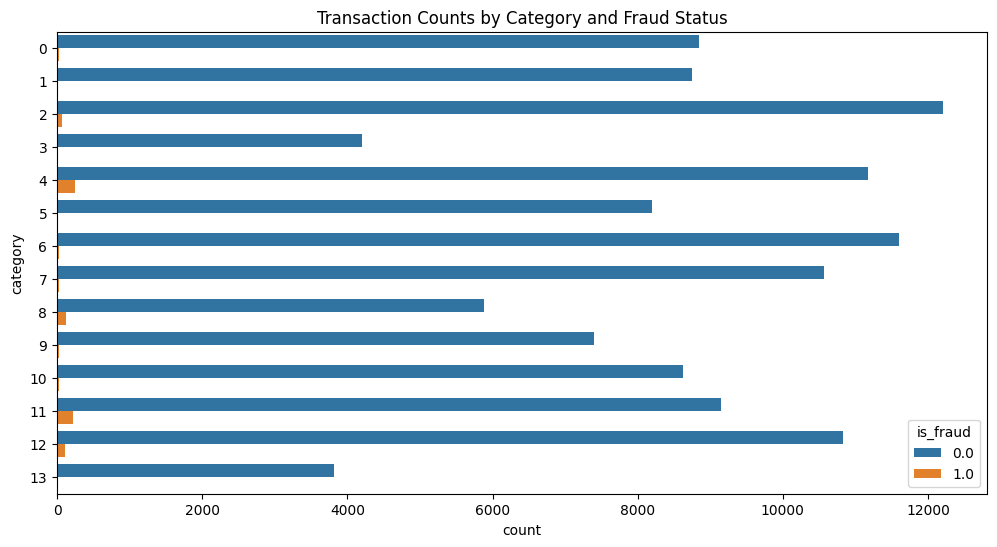

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

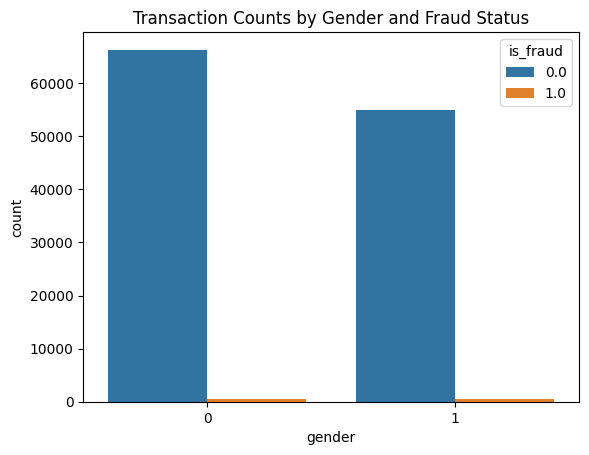

In [ ]:

sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

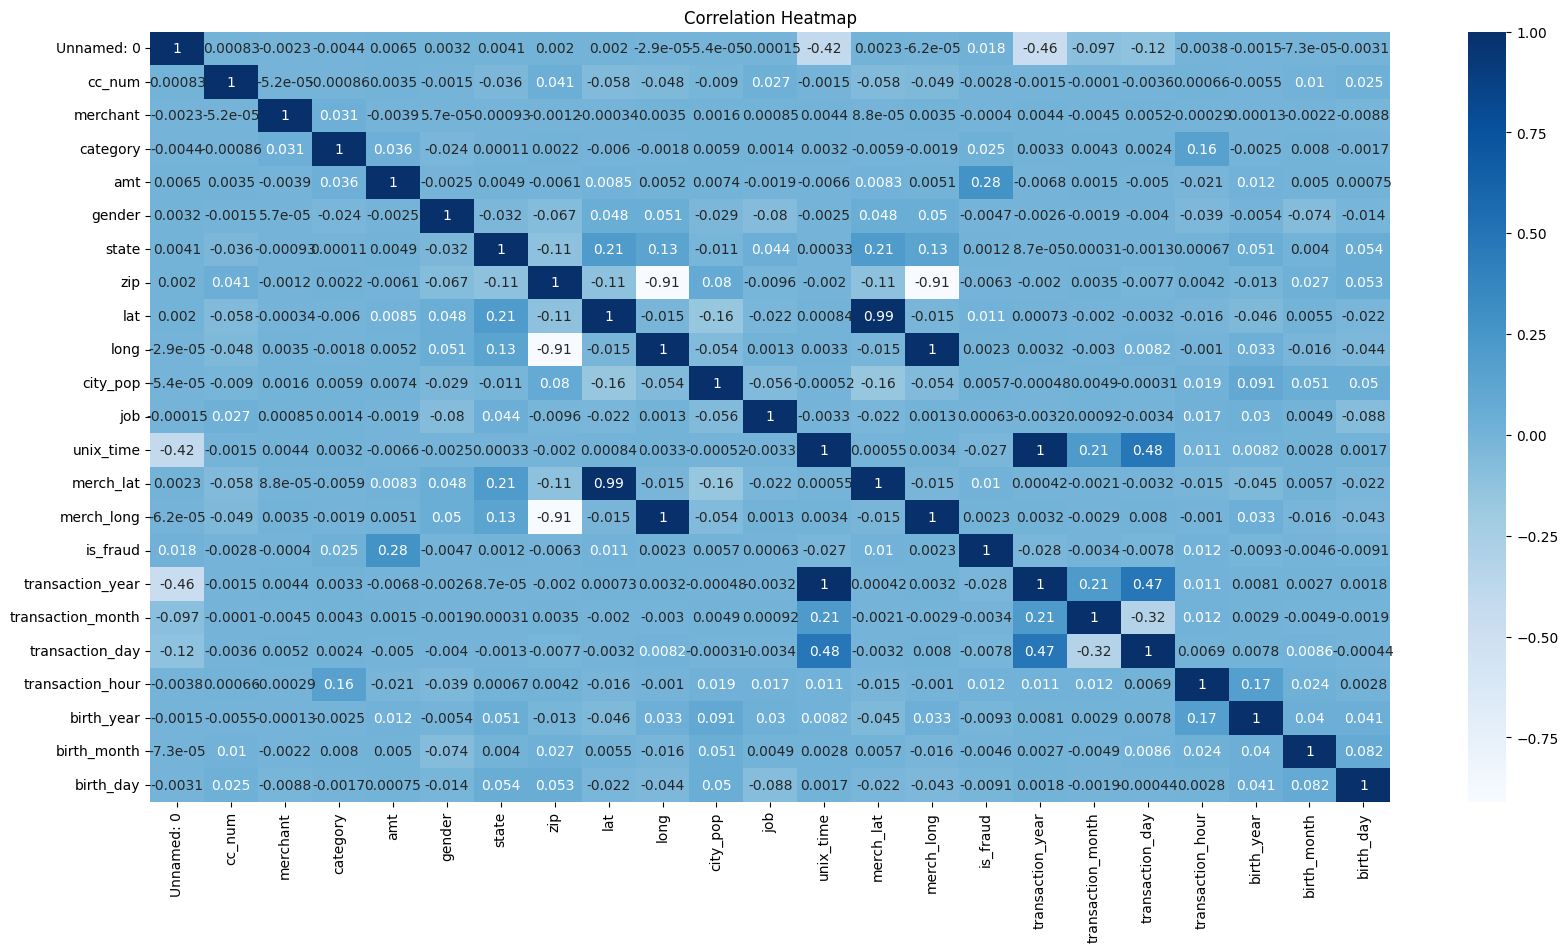

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features in X_train
X_train_encoded = X_train.copy()  # Make a copy of X_train to avoid modifying the original dataframe
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Check if the column contains categorical data
        X_train_encoded[col] = label_encoder.fit_transform(X_train[col])

# Now, all categorical features in X_train_encoded are converted to numeric format



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features in X_train
X_train_encoded = X_train.copy()  # Make a copy of X_train to avoid modifying the original dataframe
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Check if the column contains categorical data
        X_train_encoded[col] = label_encoder.fit_transform(X_train[col])

# Encode categorical features in X_test
X_test_encoded = X_test.copy()  # Make a copy of X_test to avoid modifying the original dataframe
for col in X_test.columns:
    if X_test[col].dtype == 'object':  # Check if the column contains categorical data
        X_test_encoded[col] = label_encoder.transform(X_test[col])

# Now, all categorical features in X_train_encoded are converted to numeric format


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
lr_model = LogisticRegression(max_iter=1000)

# Check for NaN or infinite values in X_train_encoded
if X_train_encoded.isnull().values.any() or not np.isfinite(X_train_encoded).all():
    # Handle missing or infinite values (e.g., imputation or removing rows)
    pass

# Fit the model on the encoded training data
try:
    lr_model.fit(X_train_encoded, y_train)
except ValueError as e:
    print("Error:", e)
print(y_train,y_test)





Error: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
43829     0.0
3029      0.0
118364    0.0
29231     0.0
24912     0.0
         ... 
119879    0.0
103694    0.0
860       0.0
15795     0.0
121958    0.0
Name: is_fraud, Length: 97756, dtype: float64 27264     0.0
632       0.0
31229     0.0
2285      0.0
23169     0.0
         ... 
44992     0.0
11644     0.0
27686     0.0
32224     0.0
118315    0.